**Load the Data**

In [31]:
import pandas as pd

# Load the datasets
anime_df = pd.read_csv('../data/anime.csv')
ratings_df = pd.read_csv('../data/rating.csv')

# Display the first few rows of each dataset
print(anime_df.head())
print(ratings_df.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4

**Explore the Data**

<i>Check for Missing Values<i>

In [32]:
# Check for missing values in the anime dataset
print(anime_df.isnull().sum())

# Check for missing values in the ratings dataset
print(ratings_df.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


<i>Handling Missing Values:<i>

In [33]:
anime_df = anime_df.dropna(subset=['genre']) # Genre is critical for content-based filtering. Without it, the model can’t generate meaningful recommendations.
anime_df['type'] = anime_df['type'].fillna('Unknown') #The type (e.g., TV, Movie) is useful but not critical for recommendations.
median_rating = anime_df['rating'].median()
anime_df['rating'] = anime_df['rating'].fillna(median_rating)#The average rating of an anime can be approximated using the median.

In [34]:
# Check for remaining missing values
print(anime_df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


<i>Analyze the Distribution of Ratings<i>

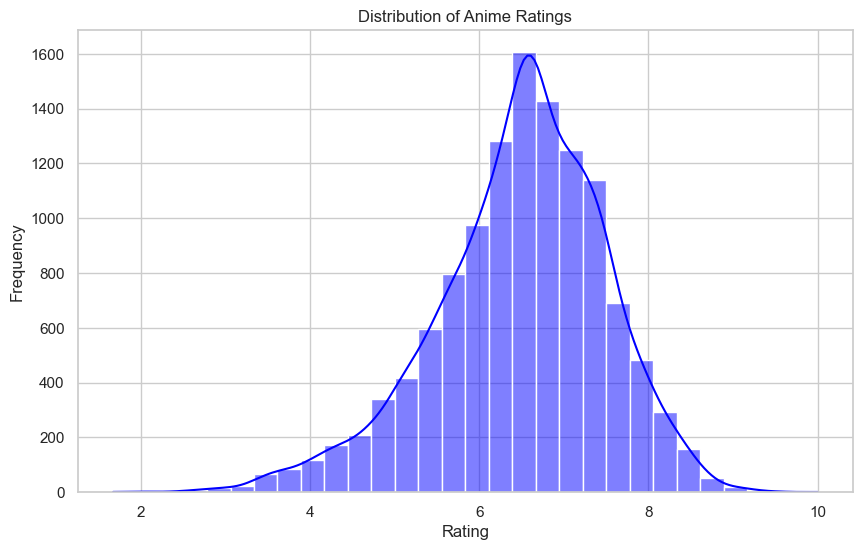

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot the distribution of anime ratings
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<i>Analyze the Distribution of Genres<i>

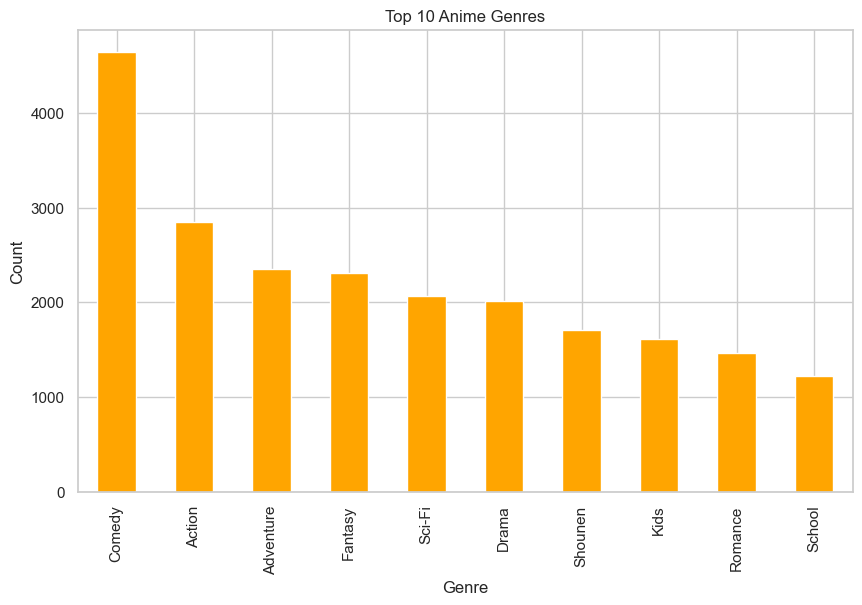

In [36]:
# Split the genre column into individual genres
anime_df['genre'] = anime_df['genre'].str.split(', ')

# Explode the genre column to have one genre per row
exploded_genres = anime_df.explode('genre')

# Count the frequency of each genre
genre_counts = exploded_genres['genre'].value_counts()

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

<i>Analyze the Distribution of Members<i>

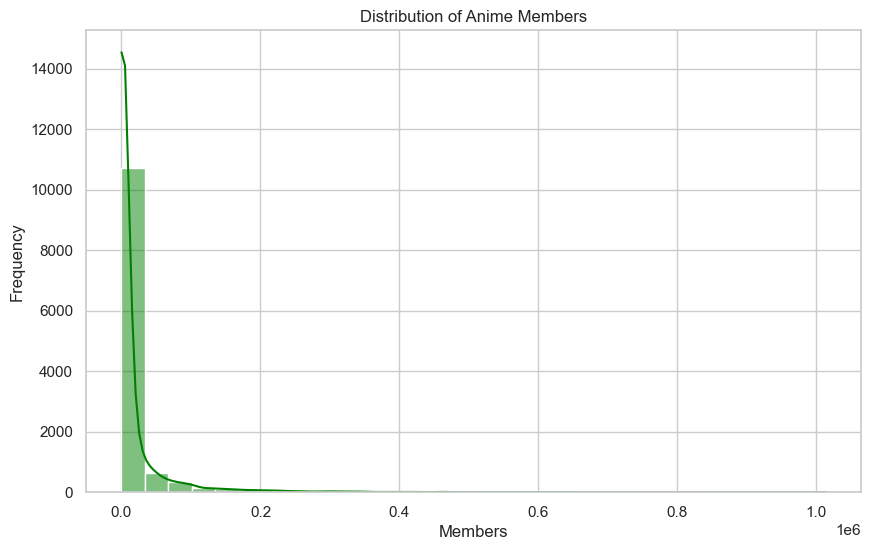

In [37]:
# Plot the distribution of members
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['members'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Anime Members')
plt.xlabel('Members')
plt.ylabel('Frequency')
plt.show()

 **Preprocess the Data**

<i>Clean the Genre Column<i>

In [38]:
# Ensure the genre column is a list of genres
anime_df['genre'] = anime_df['genre'].apply(lambda x: x if isinstance(x, list) else [])

# Display the cleaned genre column
print(anime_df['genre'].head())

0               [Drama, Romance, School, Supernatural]
1    [Action, Adventure, Drama, Fantasy, Magic, Mil...
2    [Action, Comedy, Historical, Parody, Samurai, ...
3                                   [Sci-Fi, Thriller]
4    [Action, Comedy, Historical, Parody, Samurai, ...
Name: genre, dtype: object


<i>Save the Preprocessed Data<i>

In [39]:
# Save the preprocessed anime dataset
anime_df.to_csv('../data/anime_cleaned.csv', index=False)